# Bayesian Inference using MCMC Sampling

In [1]:
import numpy as np
import scipy.stats as stats

## Observed Data
Toss an unfair coin ($P(heads) = 0.3$) 15 times:

In [2]:
observed_data = np.array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

## Prior & Starting Point for Sampling

In [3]:
prior = stats.uniform()

In [4]:
starting_point = 0.5

## MCMC Sampling from posterior

In [5]:
post_before = 1e-10
p = starting_point
ps = []

n = 2000

for i in range(n):
    ps.append(p)

    # Naively propose new p in vicinity of current p
    p_proposed = p + np.random.normal(0, .1)
    
    if p_proposed <= 0:
        p_proposed = 0.00001

    # Calculate likelihood for proposed p
    binomial_proposed = stats.binom(n=15, p=p_proposed)
    likelihood_proposed = binomial_proposed.pmf(observed_data.sum())

    # Calculate likelihood for current p
    binomial_current = stats.binom(n=15, p=p)
    likelihood_current = binomial_current.pmf(observed_data.sum())
    
    # Calculate posterior probability for proposed p as well as old p and the ratio of these two
    posterior_proposed = likelihood_proposed * prior.pdf(p_proposed)
    posterior_current = likelihood_current * prior.pdf(p_proposed)

    ratio = posterior_proposed/posterior_current

    # If lik(new_p) > lik(old_p), use proposed p for next iteration.
    # If it is worse (ratio r < 1), still use it in next iteration with probability r
    # E.g.: 10% worse (i.e. ratio = 0.9) -> use it with 90% probability
    if ratio > 1 or np.random.rand() < ratio:
        p = p_proposed

## Plots of Posterior

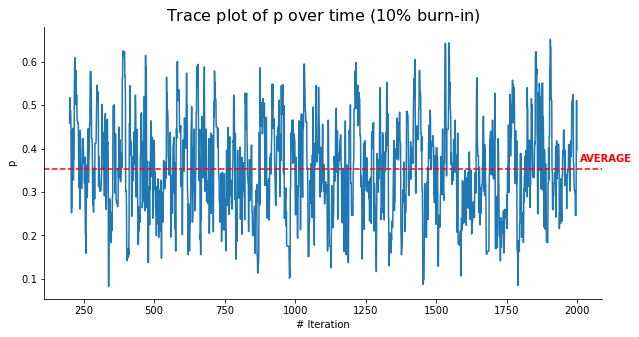

In [6]:
import matplotlib.pyplot as plt
def despine():
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

# plot trace (minus first 10% burn in)
plt.subplots(figsize=(10, 5))
plt.plot(range(n)[int(n*0.1):], ps[int(n*0.1):])
plt.title("Trace plot of p over time ($10\%$ burn-in)", size=16)
plt.xlabel("# Iteration")
plt.ylabel("p")
m = np.mean(ps[int(n*0.1):])
plt.axhline(m, color='red', ls='--')
plt.annotate("AVERAGE", (n+10, m*1.05), color='red', weight='bold');
despine()

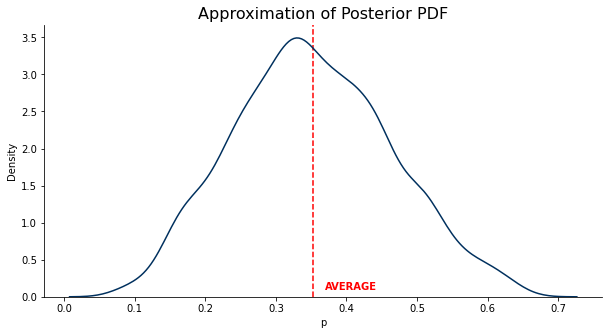

In [7]:
import seaborn as sns
plt.subplots(figsize=(10, 5))
plt.title("Approximation of Posterior PDF", size=16)
plt.xlabel("p")
plt.axvline(m, color='red', ls='--')
plt.annotate("AVERAGE", (m*1.05, 0.1), color='red', weight='bold');
plt.xticks([i/10 for i in range(11)])
sns.kdeplot(ps[int(n*0.1):], color='#00305e');
despine()